# Plotting code for the value of the option as a function of the stopping price

We load in the data created by the cpp script, and plot this

In [14]:
import csv

S = []
V = []
with open('Varying_S.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        S.append(float(row[0]))
        V.append(float(row[1]))
        line_count+=1;
    print(f'Processed {line_count} lines.')

Processed 50 lines.


In [15]:
#Check S and V
print(S)
print(V)

[0.0, 5.647, 11.294, 16.941, 22.588, 28.235, 33.882, 39.529, 45.176, 50.823, 56.47, 62.117, 67.764, 73.411, 79.058, 84.705, 90.352, 95.999, 101.646, 107.293, 112.94, 118.587, 124.234, 129.881, 135.528, 141.175, 146.822, 152.469, 158.116, 163.763, 169.41, 175.057, 180.704, 186.351, 191.998, 197.645, 203.292, 208.939, 214.586, 220.233, 225.88, 231.527, 237.174, 242.821, 248.468, 254.115, 259.762, 265.409, 271.056, 276.703]
[0.377979, 0.213954, 0.0499299, -0.114095, -0.278119, -0.442143, 0.680815, 1.80377, 2.92673, 4.04969, 5.17265, 10.4403, 15.708, 20.9757, 26.2434, 31.511, 37.8229, 44.1347, 50.4466, 56.7585, 63.0703, 69.7626, 76.4548, 83.1471, 89.8393, 96.5316, 103.268, 110.005, 116.741, 123.477, 130.214, 136.962, 143.711, 150.459, 157.208, 163.956, 170.903, 177.849, 184.796, 191.742, 198.689, 206.244, 213.8, 221.356, 228.911, 236.467, 245.003, 253.54, 262.076, 270.612]


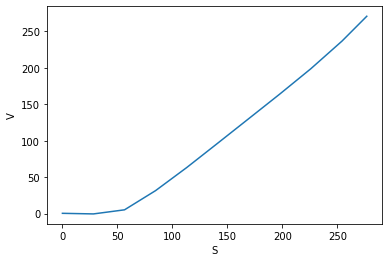

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(S,V)

plt.xlabel("S")
plt.ylabel('V')
plt.show()

In [13]:
from scipy.stats import norm
#Analytical solution of Converible bond
S=56.47
X=56.47
r=0.0038
time=3
q= 0.106*np.exp(-0.01*time)#Yield on underlying
sigma=3.73
d1 = (np.log(S/X) + (r-q+0.5*sigma*sigma) * time)/(sigma*time*time)
d2 = d1-(sigma*time*time)
price = S * np.exp(-q * time) * norm.cdf(d1) - X *np.exp(-r*time) * norm.cdf(d2)
print(price)

30.27727157228092
